# Star Classification 
-Kaggle
-Visuals:  I just loved these visuals  
https://www.kaggle.com/code/aerdem/stellar-classification-catboost-97-accuracy/notebook




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as sm 

from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,ward 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


starz = pd.read_csv('~/Desktop/Bread & Butter/star_classification 3.csv')
starz.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In this lab I will be using the Python coding language to find a good classification model for Stellar Classification Dataset SDSS17 
Found at https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

This dataset consists of 100,000 oservations of space taken by SDSS (SLoan Digital Sky Survey). 
There are 17 feature columns and 1 class columns with three classifications, Star Galaxy or Quasar. 
- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



# Visualizations 

/var/folders/rv/p7k6sc6n5tq034kkhrc70cmw0000gn/T/ipykernel_1784/3954350584.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = starz.dropna('columns') # drop columns with NaN


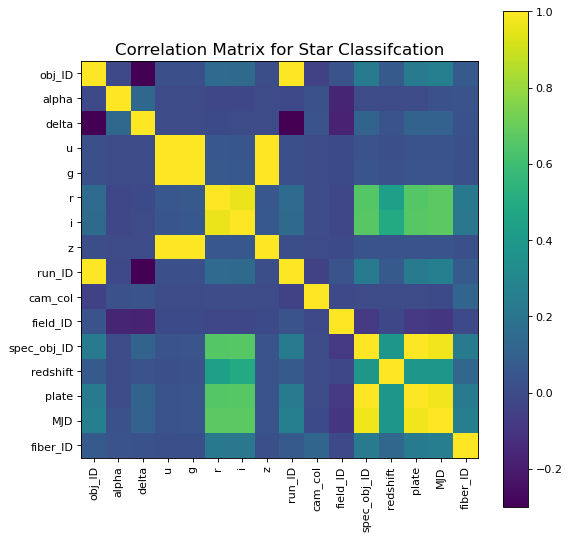

In [2]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    data = starz.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Star Classifcation', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(starz, 8)

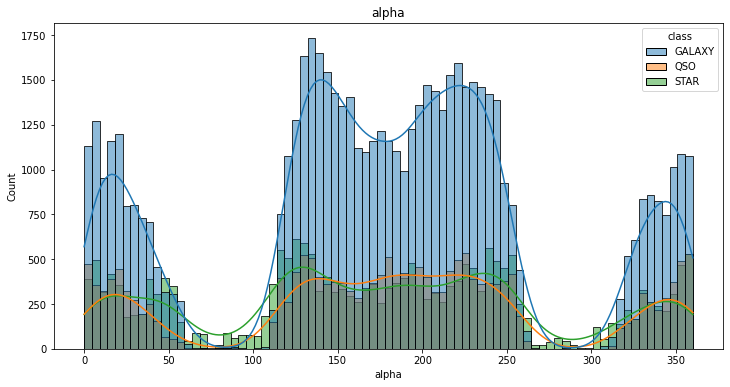

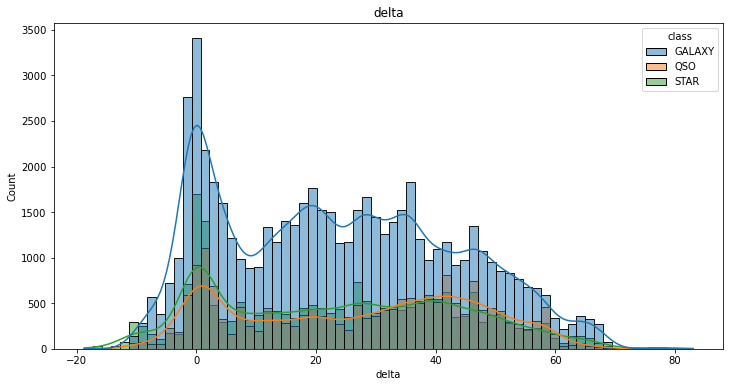

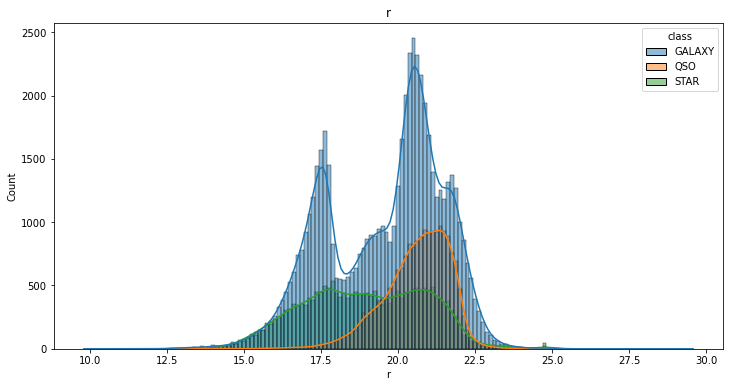

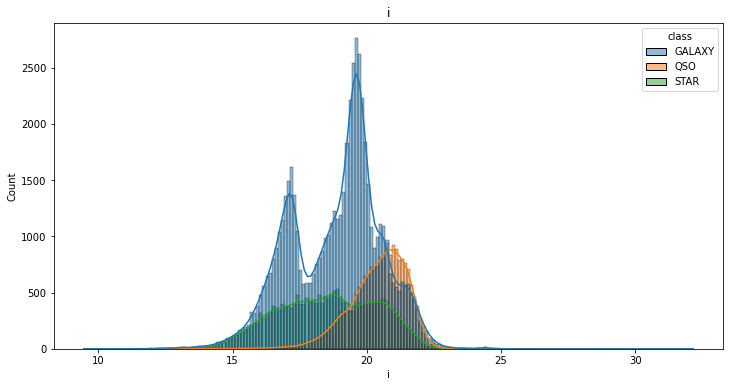

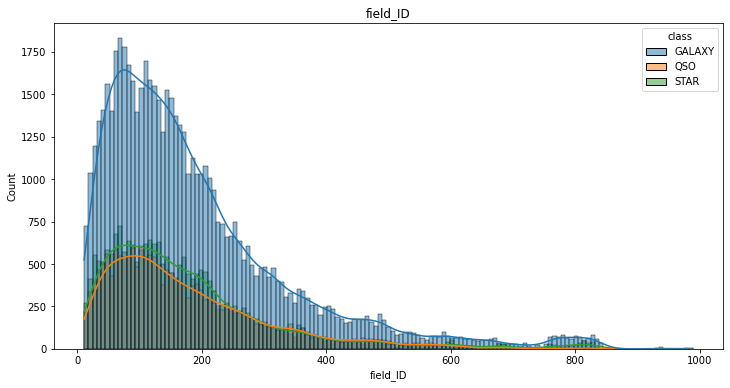

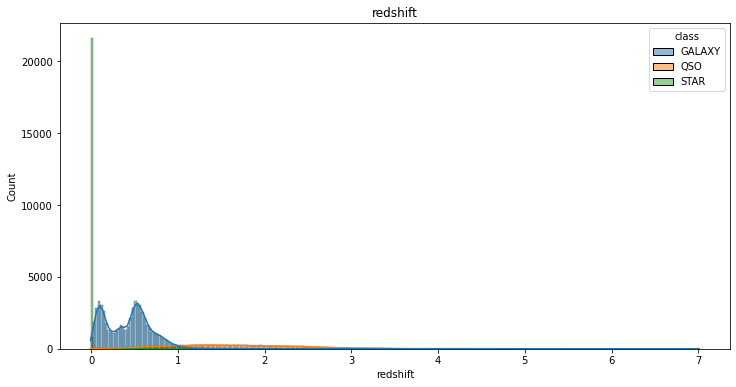

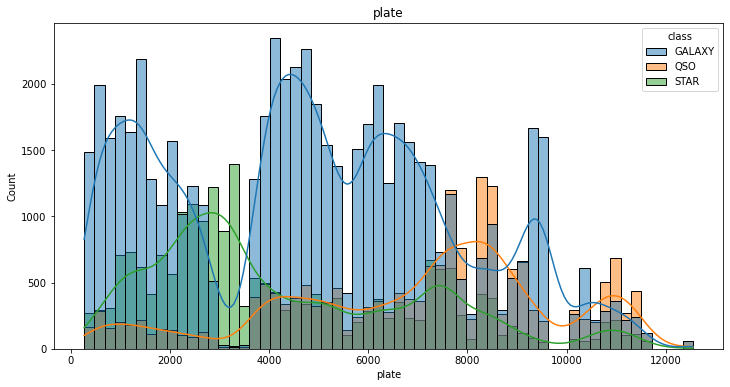

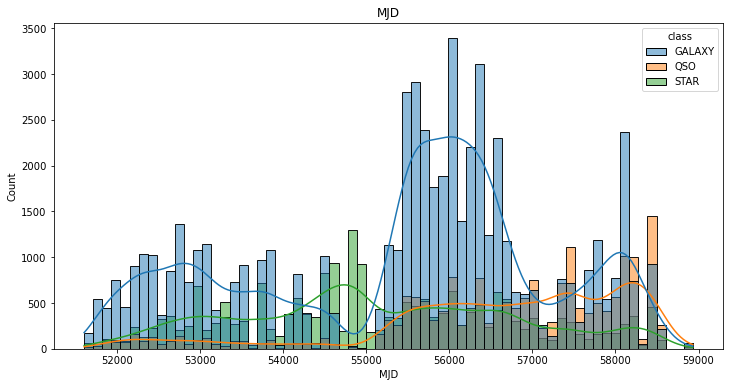

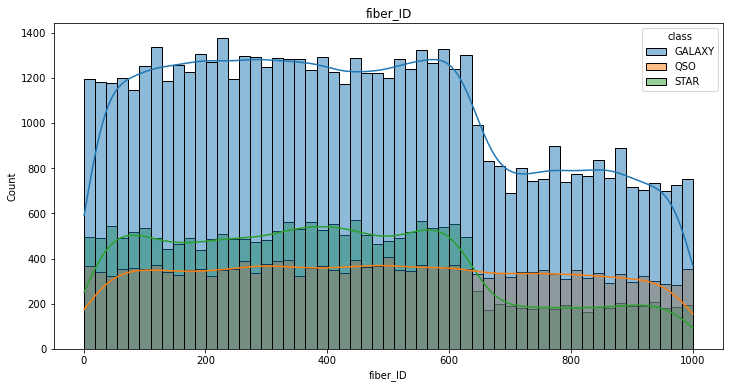

In [3]:
for column in ['alpha', 'delta','r', 'i','field_ID','redshift', 'plate', 'MJD', 'fiber_ID']:
    plt.figure(figsize=(12,6))
    sns.histplot(data=starz, x=column, kde=True, hue="class")
    plt.title(column)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = starz.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/var/folders/rv/p7k6sc6n5tq034kkhrc70cmw0000gn/T/ipykernel_1784/3613185181.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data = data.dropna('columns')


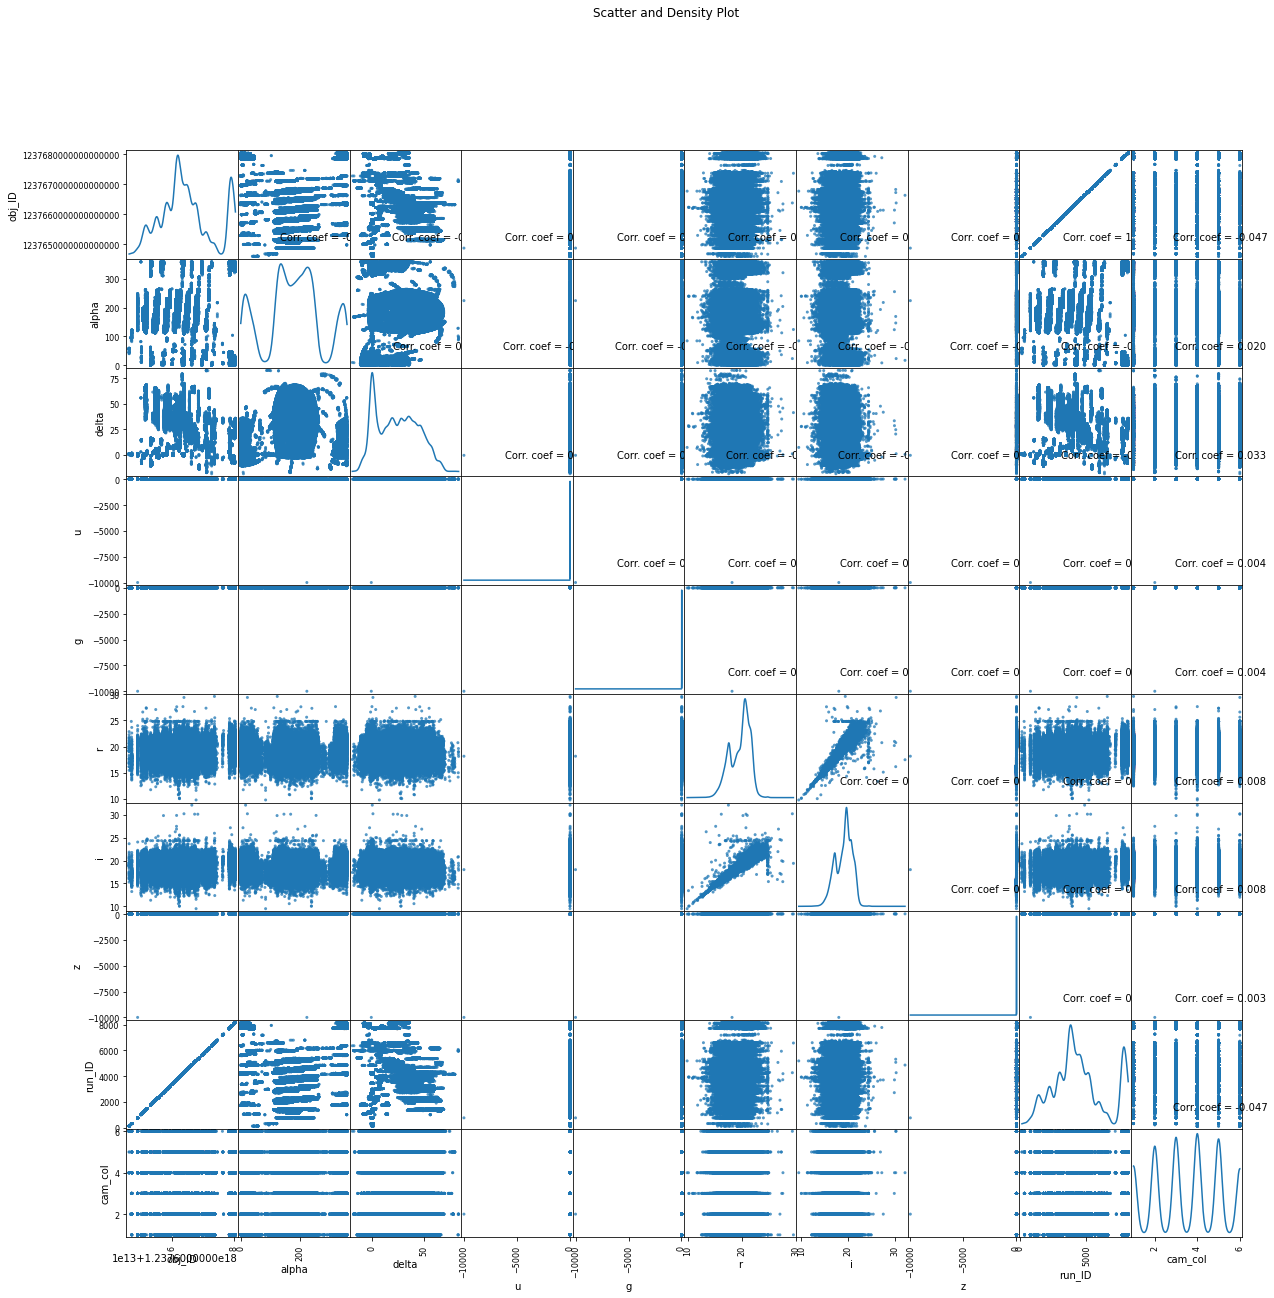

In [5]:
plotScatterMatrix(starz, 20, 10)

# Creating an encoded target rather than a string... 

In [6]:
# Thanks to Kaggle for Ordinal Encoder!!! 
col_target = 'class_enc'

dude = OrdinalEncoder()
dude.fit(starz[['class']])
print(dude.categories_) 
starz[['class_enc']] = dude.transform(starz[['class']])

cool = OneHotEncoder()
cool.fit(starz[['class']])
col_targetz = list(map(lambda s: 'class_'+s, cool.categories_[0]))
starz[col_targetz] = cool.transform(starz[['class']]).toarray()


[array(['GALAXY', 'QSO', 'STAR'], dtype=object)]


In [7]:
# Creating a 

In [8]:
x = starz[['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID']]
y = starz['class_enc']

# Splittling the data 
x_train, x_broh, y_train, y_broh = train_test_split(x,y, train_size=0.4, random_state=5)
x_valid, x_test, y_valid, y_test = train_test_split(x_broh,y_broh, test_size=0.4, random_state=5)

# Creating a continuous scale 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

# Finding a front door 
Training wheels provided by: https://theeffectbook.net

# Unsupervised Learning 

Principal Compontent Analysis 

In [9]:
pca = PCA(n_components=2)
pca.fit(x_train)
print(pca.components_)

[[-1.69571622e-01 -3.22717785e-03 -1.53312024e-02 -4.06349719e-02
  -4.35515334e-02 -3.85871166e-01 -3.89706874e-01 -4.28765720e-02
  -1.69570558e-01 -0.00000000e+00 -2.43415539e-03  3.65922221e-02
  -4.28090266e-01 -2.45394806e-01 -4.28089229e-01 -4.29788783e-01
  -1.52603733e-01]
 [ 1.08555071e-02  2.17594567e-03 -2.51687470e-03 -5.75891127e-01
  -5.75638426e-01  2.07846433e-02  2.31205857e-02 -5.75610965e-01
   1.08558821e-02  1.03397577e-25 -4.29934869e-03  5.87956145e-03
   3.63474367e-02  1.83705432e-02  3.63474410e-02  3.65670968e-02
   8.86276833e-03]]


In [10]:
print(pca.explained_variance_ratio_)

[0.29298104 0.18691049]


There looks to be 8 significant principle components to Class. 

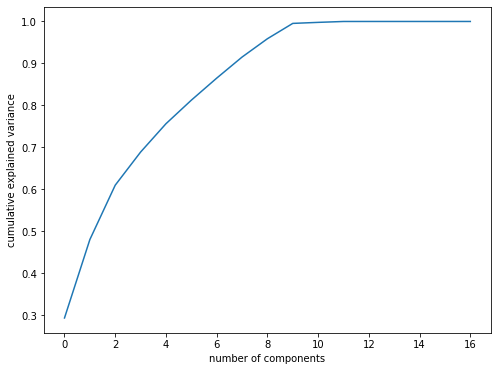

In [11]:
pca=PCA().fit(x_train)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [12]:
pca = PCA(2).fit_transform(x_train)
temp=PCA(2).fit(x_train)
temp.components_

array([[-0.16957162, -0.00322718, -0.0153312 , -0.04063497, -0.04355153,
        -0.38587117, -0.38970687, -0.04287657, -0.16957056, -0.        ,
        -0.00243416,  0.03659222, -0.42809027, -0.24539481, -0.42808923,
        -0.42978878, -0.15260373],
       [ 0.01085551,  0.00217595, -0.00251687, -0.57589113, -0.57563843,
         0.02078464,  0.02312059, -0.57561097,  0.01085588,  0.        ,
        -0.00429935,  0.00587956,  0.03634744,  0.01837054,  0.03634744,
         0.0365671 ,  0.00886277]])

In [13]:
pca.shape

(40000, 2)

Linear Discriminat Analysis 

In [14]:
decisionTree = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
full_tree = DecisionTreeRegressor()
full_tree.fit(x_train, y_train)
full_tree.get_depth()

28

In [15]:
decisionTreetwo = DecisionTreeRegressor(max_depth=28).fit(x_valid,y_valid)
broh = export_text(decisionTreetwo,feature_names=list(x.columns))
print(broh)

|--- redshift <= -0.79
|   |--- redshift <= -0.79
|   |   |--- redshift <= -0.80
|   |   |   |--- value: [0.00]
|   |   |--- redshift >  -0.80
|   |   |   |--- MJD <= -2.10
|   |   |   |   |--- r <= 0.35
|   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- r >  0.35
|   |   |   |   |   |--- value: [0.00]
|   |   |   |--- MJD >  -2.10
|   |   |   |   |--- i <= 1.78
|   |   |   |   |   |--- obj_ID <= 1.06
|   |   |   |   |   |   |--- z <= 1.72
|   |   |   |   |   |   |   |--- redshift <= -0.79
|   |   |   |   |   |   |   |   |--- alpha <= -1.66
|   |   |   |   |   |   |   |   |   |--- alpha <= -1.66
|   |   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |   |   |--- alpha >  -1.66
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- alpha >  -1.66
|   |   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |   |--- redshift >  -0.79
|   |   |   |   |   |   |   |   |--- redshift <= -0.79
|

In [16]:
mean_squared_error(full_tree.predict(x_valid), y_valid)

0.27725

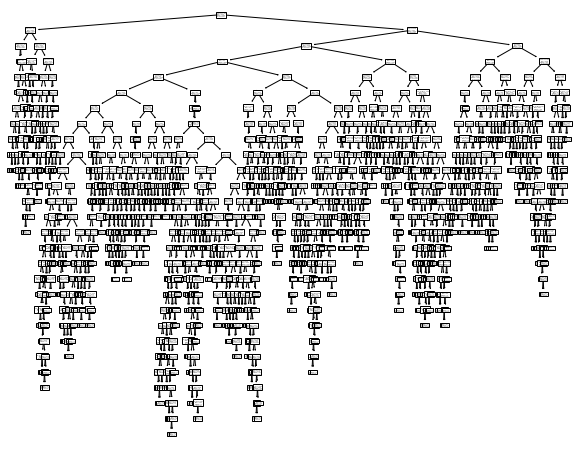

In [17]:
plt.figure(figsize=(10, 8))
tree.plot_tree(decisionTreetwo,feature_names=list(x.columns))
plt.show()

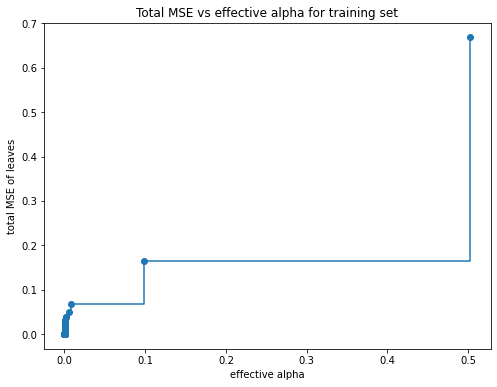

In [18]:
path = full_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total MSE of leaves")
ax.set_title("Total MSE vs effective alpha for training set")
plt.show()

In [19]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=5, ccp_alpha=ccp_alpha)
    reg.fit(x_train, y_train)
    regs.append(reg)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      regs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.502886741872008


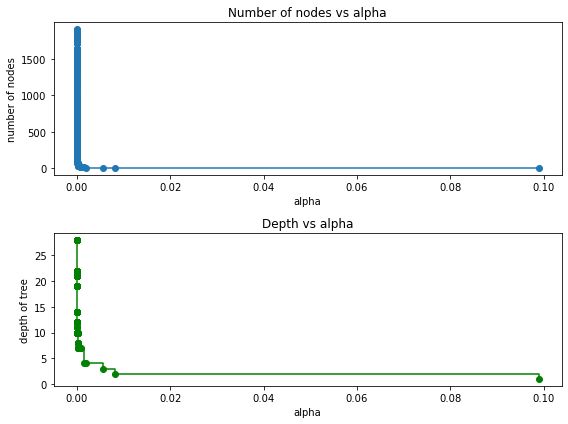

In [20]:
regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [reg.tree_.node_count for reg in regs]
node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post",color='g')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

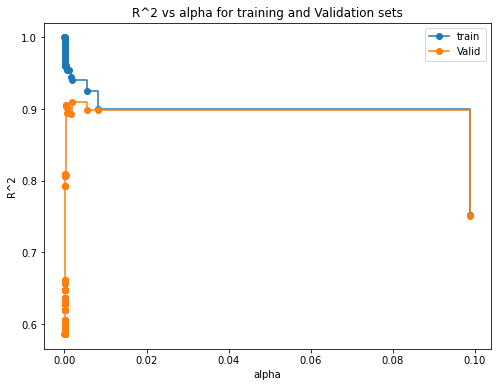

In [21]:
train_scores = [reg.score(x_train, y_train) for reg in regs]
valid_scores = [reg.score(x_valid, y_valid) for reg in regs]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs alpha for training and Validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

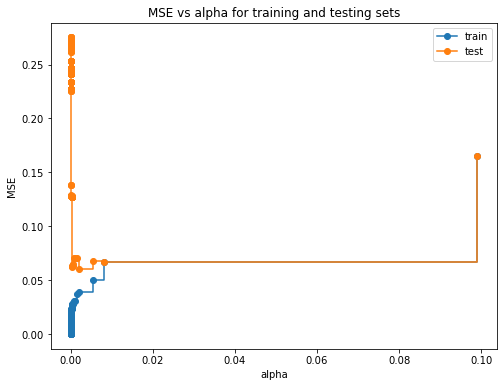

In [22]:
train_scores = [mean_squared_error(reg.predict(x_train), y_train) for reg in regs]
valid_scores = [mean_squared_error(reg.predict(x_valid),y_valid) for reg in regs]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Cross Validation 

# KNN 

In [ ]:
knn_cv_results=[]
for k in range(1,50):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    cv_nn = cross_validate(knn_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_cv_results.append(cv_nn['test_score'].mean())

In [ ]:
np.argmax(knn_cv_results)

In [ ]:
knn_reg_model=KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)
knn_reg_model.score(x_train,y_train)

In [ ]:
knn_reg_model=KNeighborsRegressor(n_neighbors=4).fit(x_train, y_train)
knn_reg_model.score(x_train,y_train)

In [ ]:
knn_reg_model=KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)
knn_reg_model.score(x_train,y_train)

Running the validation set. 

In [ ]:
knn_reg_model=KNeighborsRegressor(n_neighbors=2).fit(x_valid, y_valid)
knn_reg_model.score(x_valid,y_valid)

# Bagging 

In [ ]:
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),random_state=5).fit(x_train, y_train)
print("R^2 is {}".format(regr.score(x_train,y_train)),":",":", "MSE is {}".format(mean_squared_error(regr.predict(x_train),y_train)))

In [ ]:
num_trees=np.linspace(50,500,10)
oob_res=[]
for trs in num_trees:
    res = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=int(trs),oob_score=True,random_state=0).fit(x_train, y_train)
    oob_res.append(res.oob_score_)
num_trees[np.argmax(oob_res)]

In [ ]:
opt_trs=int(num_trees[np.argmax(oob_res)])
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=opt_trs,random_state=5).fit(x_train, y_train)
np.round(regr.score(x_valid,y_valid),3)